In [42]:
from keras.models import load_model
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
'''
참고 
https://www.kaggle.com/aymanmaboghonim/dog-breed-vision
'''

In [5]:
model = load_model('model_best.h5')














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f207d5aa410>>

In [6]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 122)               62586     
Total params: 22,914,458
Trainable params: 22,880,026
Non-trainable params: 34,432
_________________________________________________________________


In [75]:
unique_breeds = pd.read_csv('encoding_label.csv')
unique_breeds = unique_breeds.drop('Unnamed: 0', axis=1)

In [77]:
unique_breeds

,breed
0,affenpinscher
1,afghan_hound
2,african_hunting_dog
3,airedale
4,american_staffordshire_terrier
...,...
117,welsh_springer_spaniel
118,west_highland_white_terrier
119,whippet
120,wire-haired_fox_terrier


In [79]:
def transfer_image(img):
    resize = img.resize((224, 224))
    resize = np.array(resize)/255.
    resize = resize.reshape(1, 224, 224, 3)
    return resize

In [83]:
def get_pred_label(pred_prob):
    return unique_breeds.iloc[np.argmax(pred_prob)]['breed']

In [91]:
def plot_pred(pred_prob, pred_label, img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    
    plt.title("{} {:2.0f}%".format(pred_label, np.max(pred_prob)*100))

In [158]:
def plot_pred_conf(pred_prob, pred_label):
    top_10_pred_indexes = pred_prob.argsort()[0, -10:][::-1] # argsort 작은값부터 순서대로
    top_10_pred_values = pred_prob[0, top_10_pred_indexes]
    top_10_pred_labels = unique_breeds.iloc[top_10_pred_indexes]['breed']
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values, 
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    
    if True:
        top_plot[np.argmax(pred_label)].set_color("green")

In [156]:
path = os.path.join(os.getcwd(), 'dataset/test/pug')
filenames = os.listdir(path)

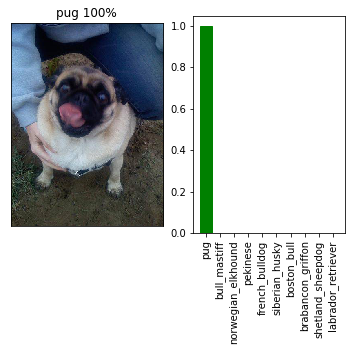

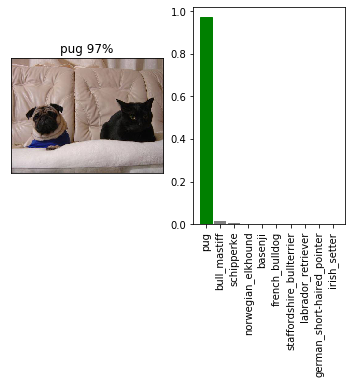

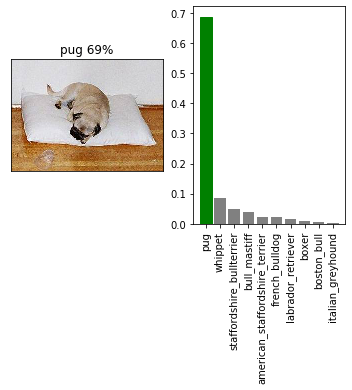

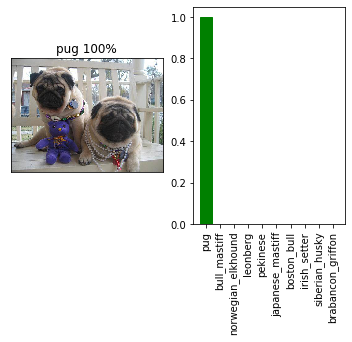

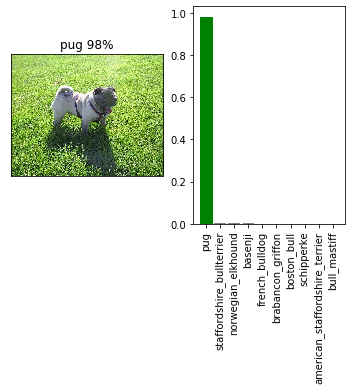

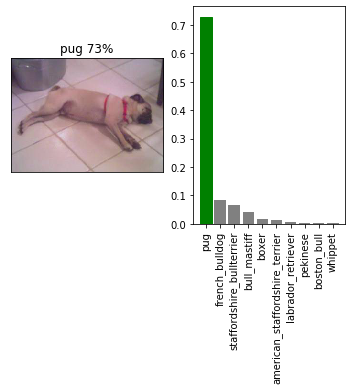

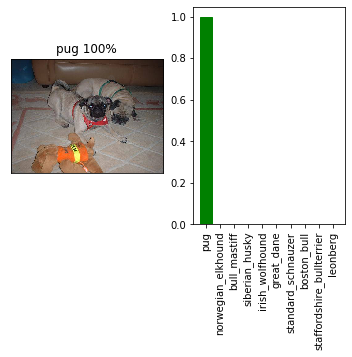

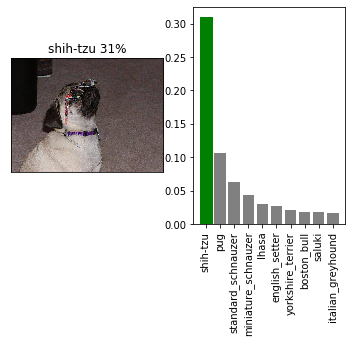

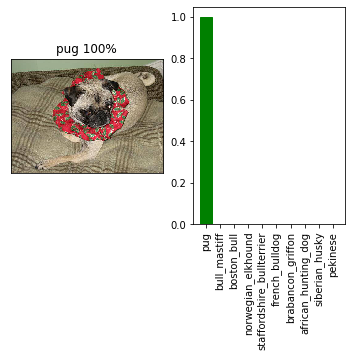

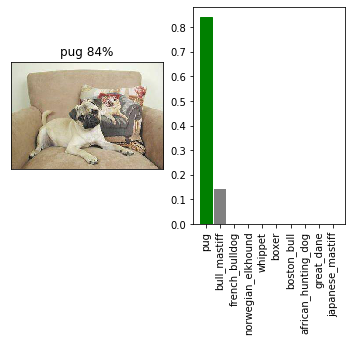

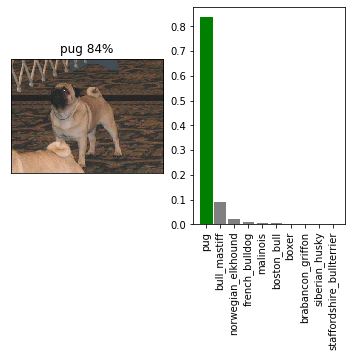

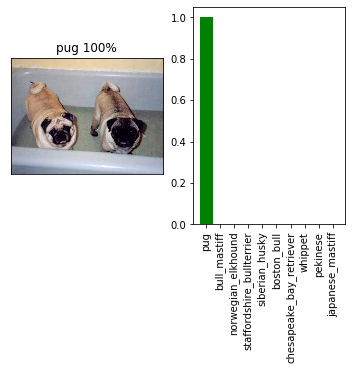

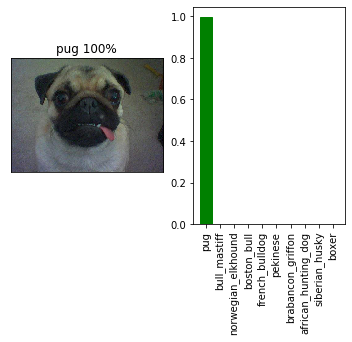

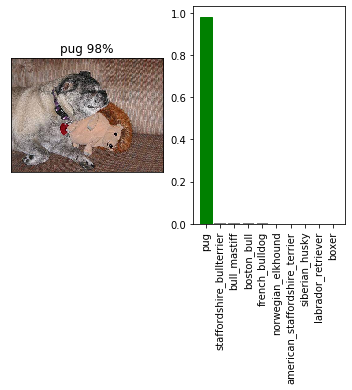

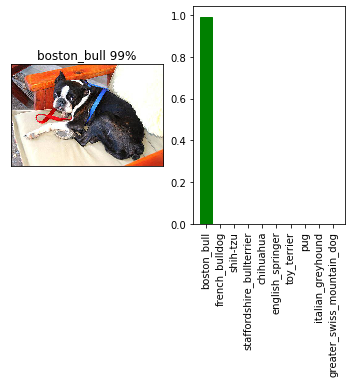

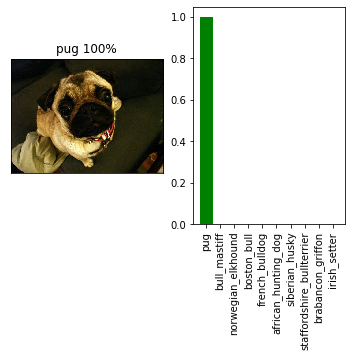

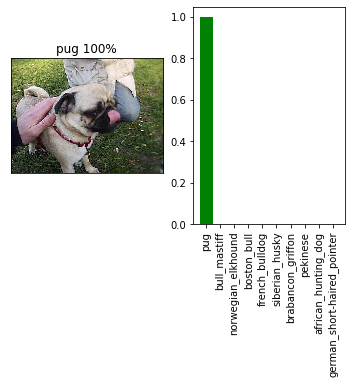

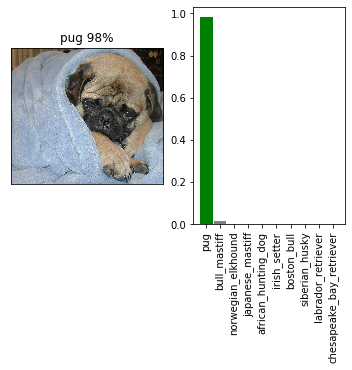

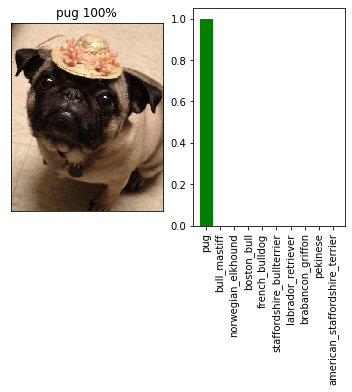

<Figure size 432x288 with 0 Axes>

In [160]:
result = []
for filename in filenames:
    path = os.path.join('./dataset/test/pug', filename)
    img = Image.open(path)
    resize = transfer_image(img)

    pred_prob = model.predict(resize)
    pred_label = get_pred_label(pred_prob)
    plt.subplot(1, 2, 1)
    plot_pred(pred_prob, pred_label, img)
    plt.subplot(1, 2, 2)
    plot_pred_conf(pred_prob, pred_label)
    plt.figure()